In [1]:
import lux

In [2]:
import pandas as pd

In [3]:
!python -m jupyter labextension list

JupyterLab v3.4.3
C:\ProgramData\Anaconda3\share\jupyter\labextensions
        jupyterlab-plotly v5.5.0 enabled ok
        jupyterlab_pygments v0.2.2 enabled ok (python, jupyterlab_pygments)
        @jupyter-widgets/jupyterlab-manager v3.1.1 enabled ok (python, jupyterlab_widgets)

Other labextensions (built into JupyterLab)
   app dir: C:\ProgramData\Anaconda3\share\jupyter\lab
        luxwidget v0.1.11 enabled ok


Build recommended, please run `jupyter lab build`:
    luxwidget needs to be included in build


In [4]:
#!python -m jupyter nbextension install --py luxwidget
!python -m jupyter nbextension enable --py luxwidget

Enabling notebook extension luxwidget/extension...
      - Validating: ok


In [5]:
#!python -m jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!python -m jupyter labextension install luxwidget

In [6]:
#To show widgets bby default instead of pandas dataframe
lux.config.default_display = "lux"

In [7]:
#Test code with test dataset to check if Lux is working
df11 = pd.read_csv("https://raw.githubusercontent.com/lux-org/lux-datasets/master/data/college.csv")
df11

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Automated EDA of Superstore Dataset

In [10]:
#Import dataset
df= pd.read_csv("C:/Users/Abhinaya/Superstore_dataset.csv")

In [11]:
#The following format specifications were suggested by Lux itself when the df is called.
#The O/P where this was suggested was too long, so I've removed it
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%m-%Y')
df['ShipDate'] = pd.to_datetime(df['ShipDate'], format='%d-%m-%Y')

In [12]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
#For debugging in case widgete isnt visible etc. 
#lux.debug_info()

## Filter for specific columns

In [14]:
df.intent = ["Segment"]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Export viz to variable for storage & display

In [23]:
df
# In the below viz, select the desired charts and press the last button in the widget "Export selected visualizations into variable"
# Then the visualizations can be accessed as elements of "exported" list of the dataframe, e.g. df.exported[0], df.exported[1]
# Note that without using the button the list wont get populated

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [24]:
#Saving the horizontal bar chart of segment-wise counts of records
vis1=df.exported[0]
vis1

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

In [25]:
#Saving the horizontal bar chart of segment-wise counts of records
vis2=df.exported[1]
vis2

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

# Exporting viz to matplotlib

In [26]:
print (vis.to_code("matplotlib"))

import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df = pd.DataFrame({'ShipMode': {0: 'First Class', 1: 'First Class', 2: 'First Class', 3: 'Same Day', 4: 'Same Day', 5: 'Same Day', 6: 'Second Class', 7: 'Second Class', 8: 'Second Class', 9: 'Standard Class', 10: 'Standard Class', 11: 'Standard Class'}, 'Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office', 3: 'Consumer', 4: 'Corporate', 5: 'Home Office', 6: 'Consumer', 7: 'Corporate', 8: 'Home Office', 9: 'Consumer', 10: 'Corporate', 11: 'Home Office'}, 'Record': {0: 769, 1: 485, 2: 284, 3: 317, 4: 114, 5: 112, 6: 1020, 7: 609, 8:

Text(0, 0.5, 'Segment')

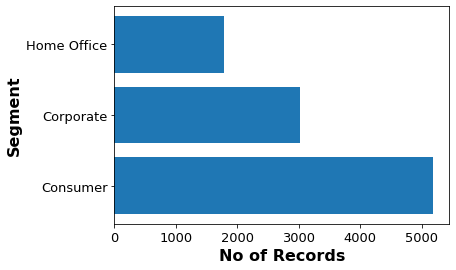

In [ ]:
#I can copy the output code above so that parameters can be modified as per my wishes below
#Minor changes may be necessary to avoid errors; rename dataframe, remove subplots, etc.
import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
df_for_chart = pd.DataFrame({'Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office'}, 'Record': {0: 5191, 1: 3020, 2: 1783}})

#fig, ax = plt.subplots()
bars = df_for_chart['Segment']
measurements = df_for_chart['Record']
#ax.barh(bars, measurements, align='center')
#ax.set_xlabel('No of Records')
#ax.set_ylabel('Segment')
plt.barh(bars,measurements, align='center')
plt.xlabel('No of Records')
plt.ylabel('Segment')

#fig

In [28]:
#Following line doesn't give individual charts even if you select multiple charts
#[print (df.exported[i]) for i in df.exported]

In [29]:
#To export a bunch of charts into a list, select individual charts (except main one of the Intent) and click Export
#The charts get stored as a list of visualizations in the df.exported attribute
bookmarked_charts = df.exported
bookmarked_charts

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

# Filter multiple columns and view in-depth charts

In [30]:
#Lets say we want to compare sales amounts across categories
df.intent = ["Sales","Category"]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Save to HTML

In [31]:
df.save_as_html('my_viz.html')

Saved HTML to my_viz.html


In [33]:
html_content  = df.save_as_html(output=True)

html_content

'\n        <html>\n        \n        <head>\n\n            <title>Lux Widget</title>\n            <link rel="lux" type="image/png" sizes="96x96" href="https://github.com/lux-org/lux-resources/blob/master/logo/favicon-96x96.png?raw=True">\n            <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.5.3/dist/css/bootstrap.min.css" integrity="sha384-TX8t27EcRE3e/ihU7zmQxVncDAy5uIKz4rEkgIXeMed4M0jlfIDPvg6uqKI2xXr2" crossorigin="anonymous">\n            <!-- Load RequireJS, used by the IPywidgets for dependency management -->\n            <script \n            src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" \n            integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" \n            crossorigin="anonymous">\n            </script>\n\n            <!-- Load IPywidgets bundle for embedding. -->\n            <script\n                data-jupyter-widgets-cdn="https://unpkg.com/"\n                data-jupyter-widgets-cdn-only\n     